<a href="https://colab.research.google.com/github/Neelhmodi/CODSOFT_INTERNSHIP/blob/main/CODSOFT_TASK_3_IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import neccesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder

Load the data and show 5 data

In [ ]:
irsi_df= pd.read_csv('/content/IRSI.csv')
irsi_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


check number of rows and columns

In [ ]:
irsi_df.shape

(150, 5)

Extract all information about data.

In [ ]:
irsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


check the null value

In [ ]:
irsi_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
irsi_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

calculate the statistics value

In [ ]:
irsi_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


count the value of speciea column

In [ ]:
irsi_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Data visualization

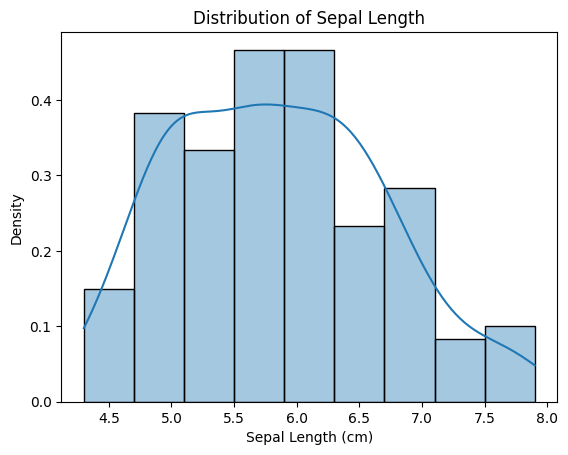

In [ ]:
# Visualize the distribution of sepal length
sns.histplot(irsi_df['sepal_length'], kde=True, stat="density", alpha=0.4)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.title("Distribution of Sepal Length")
plt.show()

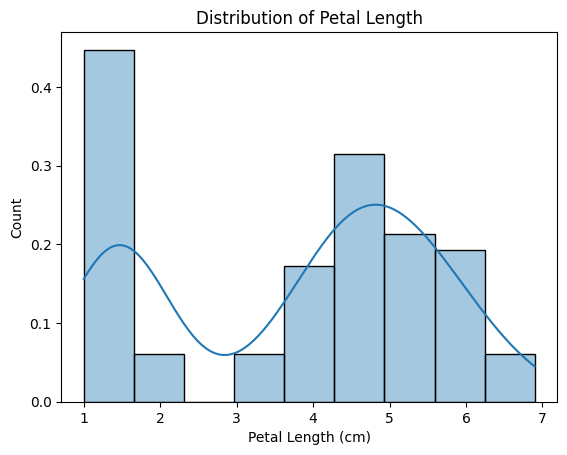

In [ ]:
# Visualize the distribution of petal length
sns.histplot(irsi_df['petal_length'], kde=True, stat="density", alpha=0.4)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Count")
plt.title("Distribution of Petal Length")
plt.show()

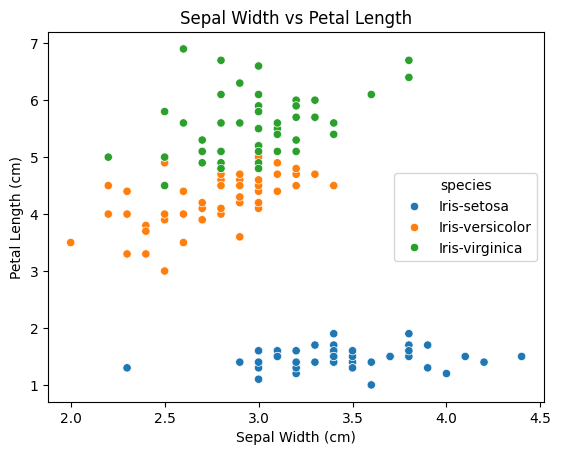

In [ ]:
# Visualize the relationship between sepal width and petal length
sns.scatterplot(x="sepal_width", y="petal_length",hue='species', data=irsi_df)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Width vs Petal Length")
plt.show()

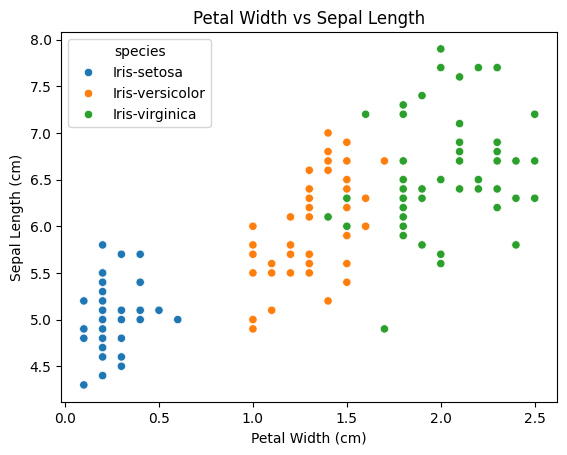

In [ ]:
# Visualize the relationship between petal width and sepal length
sns.scatterplot(x="petal_width", y="sepal_length", data=irsi_df,hue='species')
plt.xlabel("Petal Width (cm)")
plt.ylabel("Sepal Length (cm)")
plt.title("Petal Width vs Sepal Length")
plt.show()

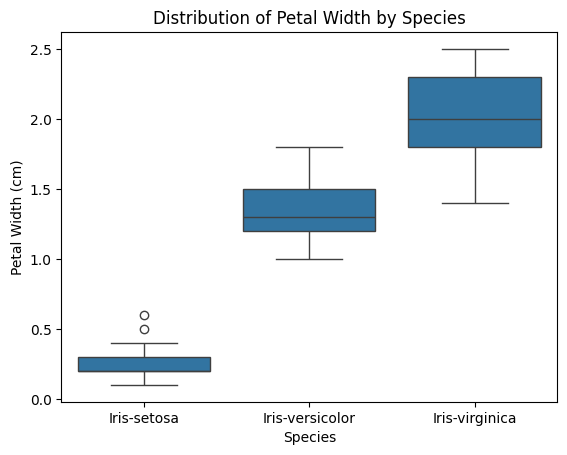

In [ ]:
# Visualize the distribution of petal width by species
sns.boxplot(x="species", y="petal_width", data=irsi_df)
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.title("Distribution of Petal Width by Species")
plt.show()

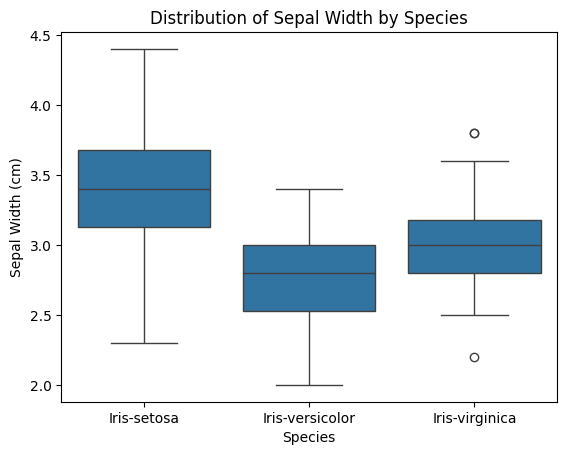

In [ ]:
# Visualize the distribution of sepal width by species
sns.boxplot(x="species", y="sepal_width", data=irsi_df)
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.title("Distribution of Sepal Width by Species")
plt.show()


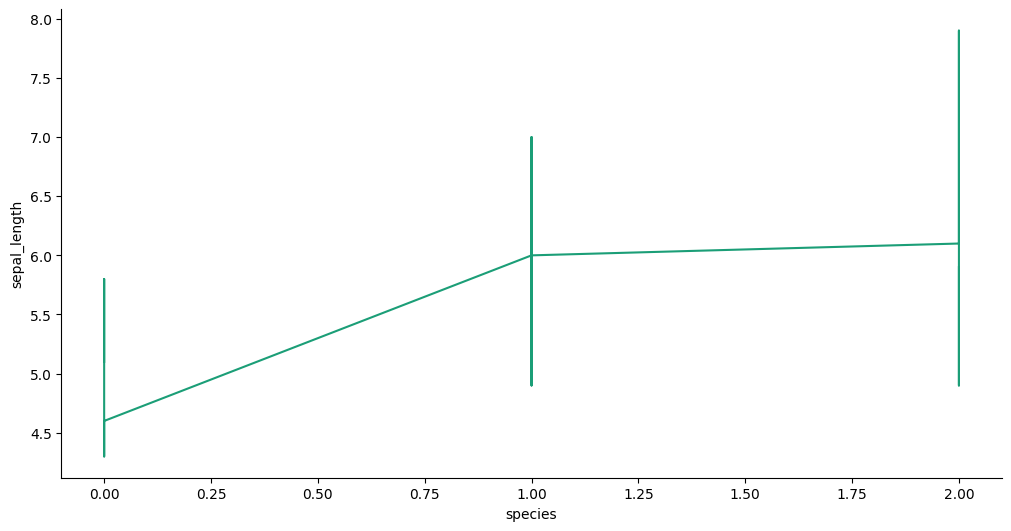

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['sepal_length']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = irsi_df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('sepal_length')

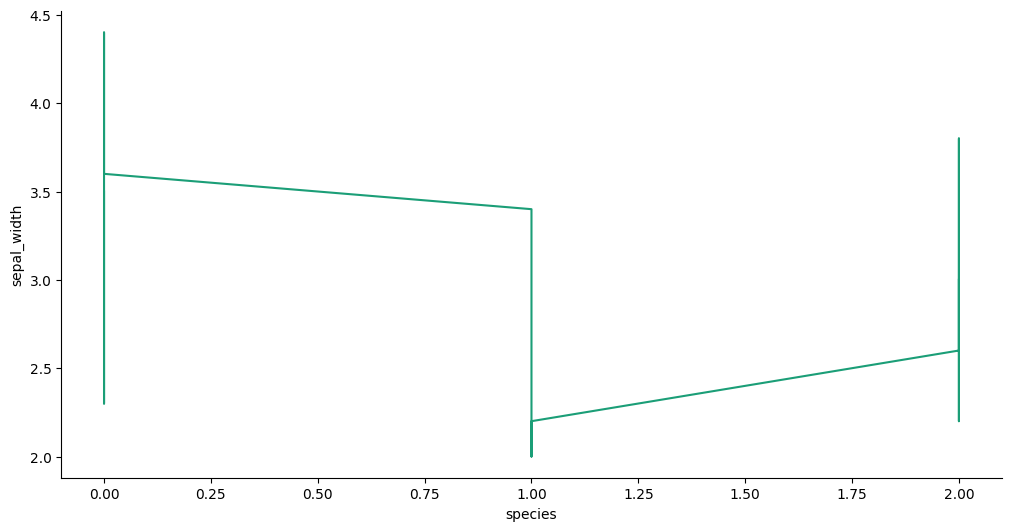

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['sepal_width']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = irsi_df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('sepal_width')

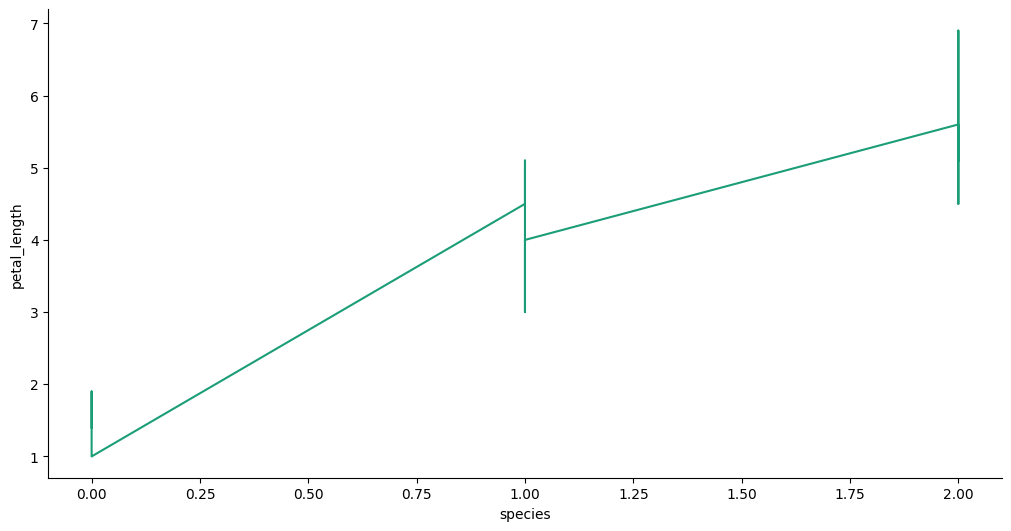

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['petal_length']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = irsi_df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('petal_length')

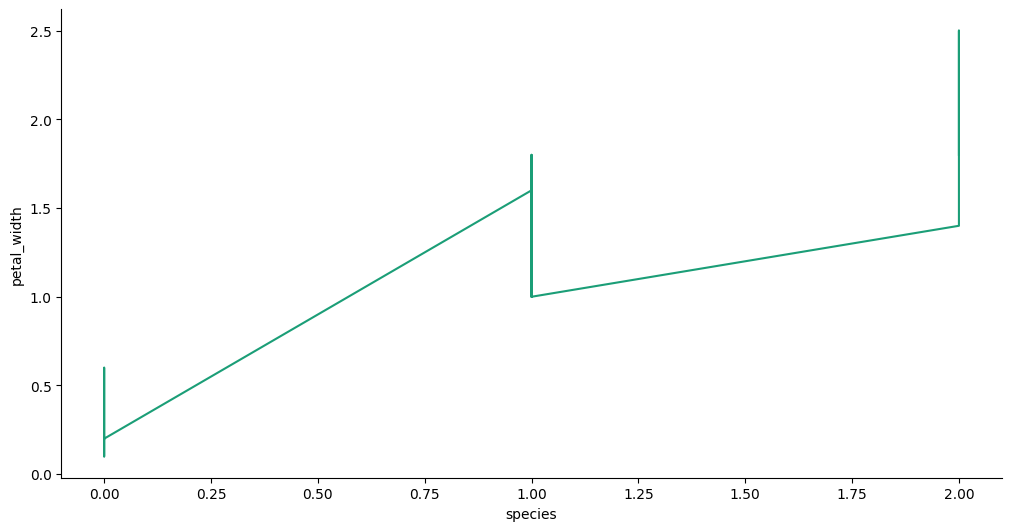

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['petal_width']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = irsi_df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('petal_width')

Remove outlier from the dataset

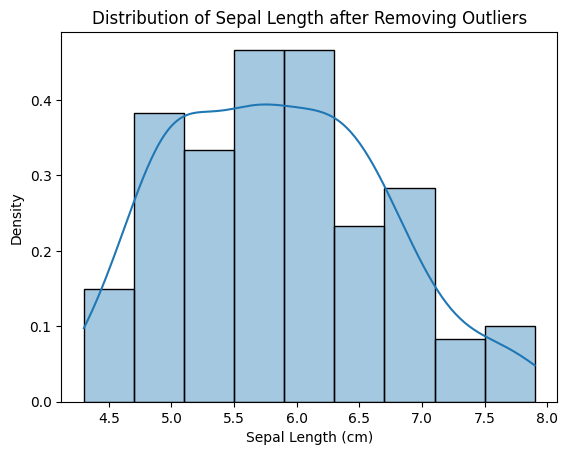

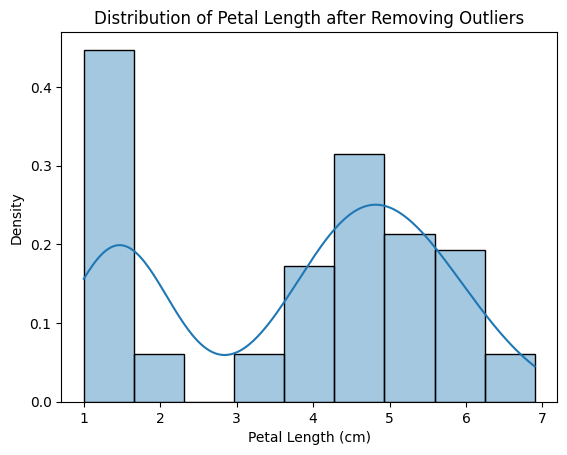

In [ ]:
def remove_outliers_IQR(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

# Remove outliers from sepal length and petal length
numeric_columns = ['sepal_length', 'petal_length']
irsi_df_filtered = remove_outliers_IQR(irsi_df.copy(), numeric_columns)

# Plot the distribution of sepal length after removing outliers
sns.histplot(irsi_df_filtered['sepal_length'], kde=True, stat="density", alpha=0.4)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.title("Distribution of Sepal Length after Removing Outliers")
plt.show()

# Plot the distribution of petal length after removing outliers
sns.histplot(irsi_df_filtered['petal_length'], kde=True, stat="density", alpha=0.4)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Density")
plt.title("Distribution of Petal Length after Removing Outliers")
plt.show()


categorical data converter into numaric data using OneHotEncoder

In [ ]:
irsi_df.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}, inplace=True)
irsi_df .head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Deviding the data into Dependent and Independent variables.

In [ ]:
x= irsi_df.drop(columns='species', axis=1)
y= irsi_df['species']

In [ ]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [ ]:
irsi_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

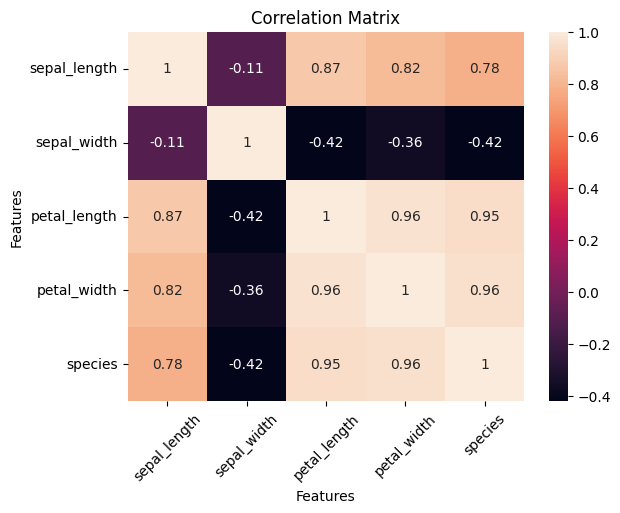

In [ ]:
sns.heatmap(irsi_df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=RandomForestClassifier()
model_RandomForest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model_RandomForest.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Accuracy Score :  100.0
Precision Score :  100.0
Recall Score :  100.0
F1 Score :  100.0


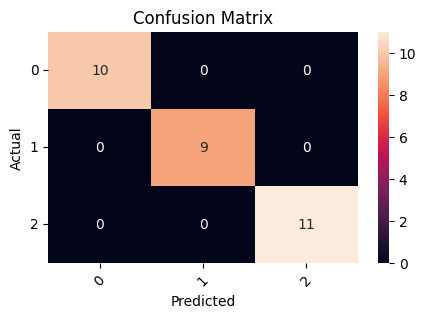

In [ ]:
print('Accuracy Score : ',round(accuracy_score(y_test,model_RandomForest.predict(x_test)),4)*100)
print('Precision Score : ',round(precision_score(y_test,model_RandomForest.predict(x_test),average='weighted'),4)*100)
print('Recall Score : ',round(recall_score(y_test,model_RandomForest.predict(x_test),average='weighted'),4)*100)
print('F1 Score : ',round(f1_score(y_test,model_RandomForest.predict(x_test),average='weighted'),4)*100)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,model_RandomForest.predict(x_test)),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
model_LogisticRegression.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model_LogisticRegression.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Accuracy Score :  100.0
Precision Score :  100.0
Recall Score :  100.0
F1 Score :  100.0


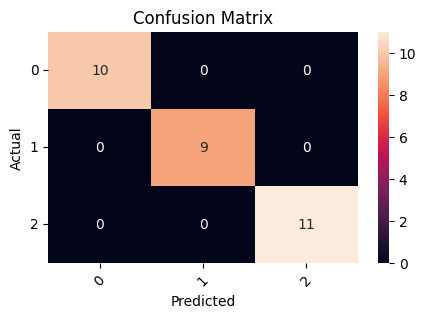

In [ ]:
print('Accuracy Score : ',round(accuracy_score(y_test,model_LogisticRegression.predict(x_test)),4)*100)
print('Precision Score : ',round(precision_score(y_test,model_LogisticRegression.predict(x_test),average='weighted'),4)*100)
print('Recall Score : ',round(recall_score(y_test,model_LogisticRegression.predict(x_test),average='weighted'),4)*100)
print('F1 Score : ',round(f1_score(y_test,model_LogisticRegression.predict(x_test),average='weighted'),4)*100)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,model_LogisticRegression.predict(x_test)),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.svm import SVC
model_SVC=SVC()
model_SVC.fit(x_train,y_train)

SVC()

In [ ]:
model_SVC.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Accuracy Score :  100.0
Precision Score :  100.0
Recall Score :  100.0
F1 Score :  100.0


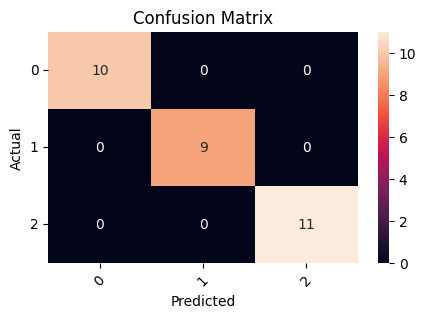

In [ ]:
print('Accuracy Score : ',round(accuracy_score(y_test,model_SVC.predict(x_test)),4)*100)
print('Precision Score : ',round(precision_score(y_test,model_SVC.predict(x_test),average='weighted'),4)*100)
print('Recall Score : ',round(recall_score(y_test,model_SVC.predict(x_test),average='weighted'),4)*100)
print('F1 Score : ',round(f1_score(y_test,model_SVC.predict(x_test),average='weighted'),4)*100)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,model_SVC.predict(x_test)),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model_DecisionTree.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Accuracy Score :  100.0
Precision Score :  100.0
Recall Score :  100.0
F1 Score :  100.0


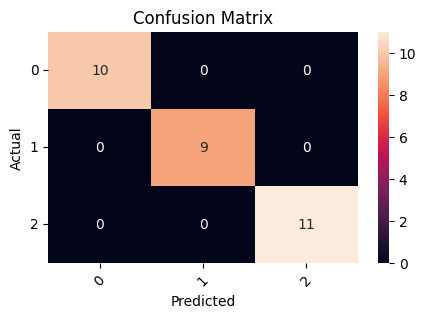

In [ ]:
print('Accuracy Score : ',round(accuracy_score(y_test,model_DecisionTree.predict(x_test)),4)*100)
print('Precision Score : ',round(precision_score(y_test,model_DecisionTree.predict(x_test),average='weighted'),4)*100)
print('Recall Score : ',round(recall_score(y_test,model_DecisionTree.predict(x_test),average='weighted'),4)*100)
print('F1 Score : ',round(f1_score(y_test,model_DecisionTree.predict(x_test),average='weighted'),4)*100)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,model_DecisionTree.predict(x_test)),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()